# Feature Extraction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import data
df = pd.read_csv('C:/Users/hp/Downloads/oracle/train.csv')

In [2]:
# Overview
df.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [3]:
# Descriptive statistics
df.describe()

,TweetId
count,6.525000e+03
mean,2.887131e+17
std,5.139819e+16
min,2.390931e+10
25%,2.941380e+17
50%,3.025319e+17
75%,3.053242e+17
max,3.068341e+17


In [4]:
# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Analyse missing data
def draw_missing_data_table(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
TweetText,0,0.0
Label,0,0.0
TweetId,0,0.0


In [5]:
# Data types
df.dtypes

TweetId       int64
Label        object
TweetText    object
dtype: object

In [6]:
# Define categorical variables
df['Label'] = pd.Categorical(df['Label'])
df['TweetText'] = pd.Categorical(df['TweetText'])
df.dtypes

TweetId         int64
Label        category
TweetText    category
dtype: object

In [7]:
cleanup_nums = {"Label":     {"Sports": 0, "Politics": 1}}
df = df.replace(cleanup_nums)
df["Label"].value_counts()

0    3325
1    3200
Name: Label, dtype: int64

# Relating the variables with scatterplots

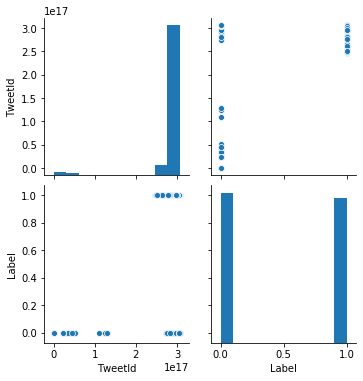

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
df.head(10)

,TweetId,Label,TweetText
0,304271250237304833,1,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,1,'@rraina1481 I fear so'
2,303568995880144898,0,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,0,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,0,'@cricketfox Always a good thing. Thanks for t...
5,306713195832307712,1,'Dr. Rajan: Fiscal consolidation will create m...
6,306100962337112064,1,"FACT: More than 800,000 defense employees will..."
7,305951758759366657,0,"'1st Test. Over 39: 0 runs, 1 wkt (M Wade 0, M..."
8,304482567158104065,0,Some of Africa's top teams will try and take a...
9,303806584964935680,0,'Can you beat the tweet of @RoryGribbell and z...


In [10]:
confirme=LabelEncoder()
df['Label']=confirme.fit_transform(df['Label'])
df.head()

NameError: name 'LabelEncoder' is not defined

In [ ]:
x=df['Label']
x.head(3)

In [ ]:
df['Label'].value_counts()

In [ ]:
sns.countplot(df['Label'])

# Model Training

In [16]:
#read our data and load the necessary libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [17]:
train = pd.read_csv('C:/Users/hp/Downloads/oracle/train.csv')
test=pd.read_csv('C:/Users/hp/Downloads/oracle/test.csv')

In [18]:
#let’s first combine train and test set
combi = train.append(test, ignore_index=True)
#remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [19]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['TweetText'], "@[\w]*")

In [20]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [22]:
#removing short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,TweetId,Label,TweetText,tidy_tweet
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,#SecKerry value measured dollars terms deepest...
1,304834304222064640,Politics,'@rraina1481 I fear so',fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,Watch video highlights #wwc final between Aust...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,Nitro Circus #AlbertPark #theymakeitlooksoeasy...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,Always good thing Thanks feedback


In [23]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#SecKerry, value, measured, dollars, terms, d...
1                                               [fear]
2    [Watch, video, highlights, #wwc, final, betwee...
3    [Nitro, Circus, #AlbertPark, #theymakeitlookso...
4              [Always, good, thing, Thanks, feedback]
Name: tidy_tweet, dtype: object

In [24]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#seckerri, valu, measur, dollar, term, deepes...
1                                               [fear]
2    [watch, video, highlight, #wwc, final, between...
3    [nitro, circu, #albertpark, #theymakeitlooksoe...
4                [alway, good, thing, thank, feedback]
Name: tidy_tweet, dtype: object

In [25]:
#stitch tokens together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

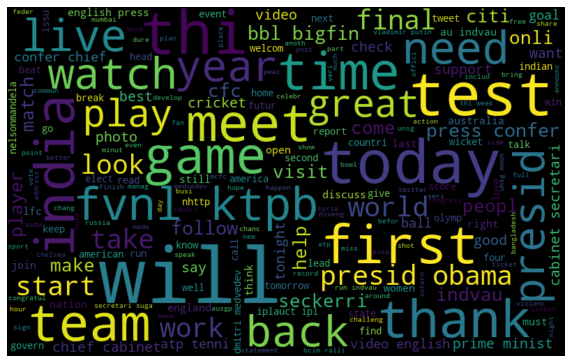

In [26]:
#visualize all the words our data using the wordcloud plot.
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

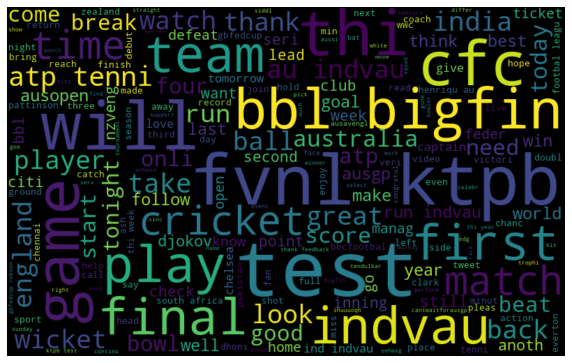

In [27]:
#Words in Sports tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Label'] == 'Sports']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

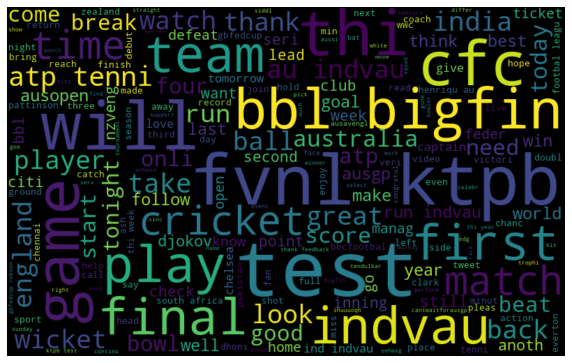

In [28]:
#Words in Political tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Label'] == 'Sports']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
#extracting features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow

<9135x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 49701 stored elements in Compressed Sparse Row format>

# Model Building

In [33]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow = bow[:6525,:]
test_bow = bow[6525:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred=np.array(lreg.predict(xvalid_bow))
y=np.array(yvalid)

# Performance

In [38]:
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

In [39]:
print(confusion_matrix(yvalid,y_pred))

[[837 119]
 [ 55 947]]


In [42]:
print(accuracy_score(yvalid,y_pred))#91% of accuracy

0.9111338100102145


In [43]:
print(classification_report(yvalid,y_pred))

              precision    recall  f1-score   support

    Politics       0.94      0.88      0.91       956
      Sports       0.89      0.95      0.92      1002

    accuracy                           0.91      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.91      0.91      0.91      1958

